In [159]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, fetch_california_housing

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score

# Корисні функції

In [110]:
def estimation_linear_regr(y_train, y_test, y_train_pred, y_test_pred):
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss  = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)

    return train_loss, test_loss, r2_train, r2_test

In [111]:
def plot_predictions(y, y_pred_lin, y_pred_rf):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y, y_pred_lin, color = 'blue', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.title("Лінійна регресія")
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")

    plt.subplot(1, 2, 2)
    plt.scatter(y, y_pred_rf, color = 'green', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.title("Random Forest регресія")
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")

    plt.tight_layout()
    plt.show()

# Завдання 1

In [112]:
diabetes_sklearn = load_diabetes()

df_diabetes = pd.DataFrame(data = diabetes_sklearn.data,
                           columns = diabetes_sklearn.feature_names)

df_diabetes['target'] = diabetes_sklearn.target


## 1. Вивести перших 5 рядків

In [113]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [114]:
df_diabetes.shape

(442, 11)

- age: Age in years
- sex: Gender of the patient
- bmi: Body mass index
- bp: Average blood pressure
- s1: Total serum cholesterol (tc)
- s2: Low-density lipoproteins (ldl)
- s3: High-density lipoproteins (hdl)
- s4: Total cholesterol / HDL (tch)
- s5: Possibly log of serum triglycerides level (ltg)
- s6: Blood sugar level (glu)

## 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення

In [115]:
df_diabetes.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

В датасеті немає пропущених значень

## 3. Перевірити наявність дублікатів, при виявленні – видалити

In [116]:
df_diabetes.duplicated().sum()

0

В датасеті немає дублікатів

## 4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення

In [117]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [118]:
df_diabetes.sex.unique()

array([ 0.05068012, -0.04464164])

Стовпець `sex` має два унікальних значення.
Припустимо, що значення 0.05068012 - жінки, а -0.04464164 - чоловіки. Тоді значення 0.05068012 заміню на 1 (жінки), а -0.04464164 - на 0 (чоловіки)

In [119]:
df_diabetes['sex'] = df_diabetes['sex'].astype(str)

In [120]:
df_diabetes.sex.unique()

array(['0.05068011873981862', '-0.044641636506989144'], dtype=object)

In [121]:
df_diabetes['sex'] = df_diabetes['sex'].map({'0.05068011873981862': 1, '-0.044641636506989144': 0})

In [122]:
df_diabetes.sex.unique()

array([1, 0], dtype=int64)

## 5. Перевірити тип даних. При необхідності замінити тип даних на числовий

In [123]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    int64  
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [124]:
df_diabetes.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


Всі стовпці мають числовий тип даних, тому наразі непотрібно нічого змінювати.

## 6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.Побудувати теплову карту кореляції.


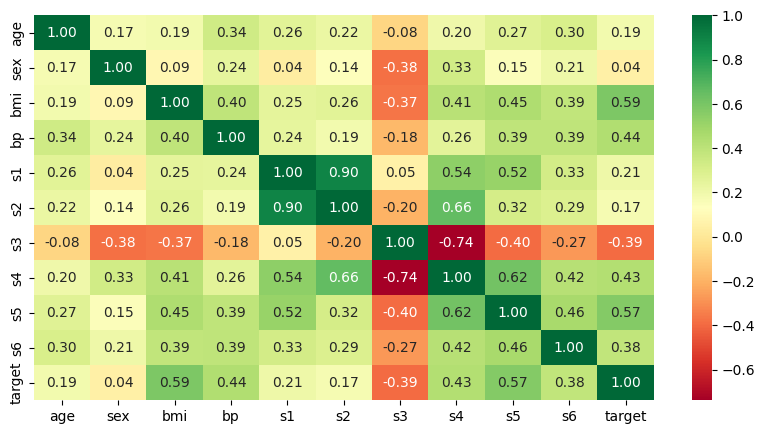

In [125]:
corr_diabetes = df_diabetes.corr()

plt.figure(figsize = (10, 5))
sns.heatmap(data = corr_diabetes, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [126]:
highest_correlation = corr_diabetes.unstack().sort_values(ascending = False)
highest_correlation = highest_correlation[highest_correlation < 1].head(5)

print(f"Пари з найвищою кореляцією:\n{highest_correlation}")

Пари з найвищою кореляцією:
s2  s1    0.896663
s1  s2    0.896663
s2  s4    0.659817
s4  s2    0.659817
    s5    0.617859
dtype: float64


In [127]:
corr_diabetes['target'].sort_values()

s3       -0.394789
sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441482
s5        0.565883
bmi       0.586450
target    1.000000
Name: target, dtype: float64

Найбільше зі змінною `target` корелюють `bmi`, `s5`.

## 7. Поділити дані на тренувальну і тестову вибірки

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.drop(columns = ['target']), 
                                                    df_diabetes['target'], 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [129]:
display(X_train.head(), y_train.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,1,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,1,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,0,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,0,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,0,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

## 8. Масштабувати ознаки

In [130]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

## 9-10. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число). Вивести коефіцієнт детермінації і середньоквадратичну помилку.

In [131]:
model_lin = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred_lin = model_lin.predict(X_train_scaled)
y_test_pred_lin = model_lin.predict(X_test_scaled)

train_loss_lin, test_loss_lin, r2_train_lin, r2_test_lin = estimation_linear_regr(y_train, y_test, y_train_pred_lin, y_test_pred_lin)

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss_lin, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss_lin, 2)}')
print(f'\nКоефіцієнт детермінації (R²) на тренувальному наборі даних: {round(r2_train_lin, 2)}')
print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {round(r2_test_lin, 2)}')

Помилка моделі на тренувальному наборі даних: 2868.55
Помилка моделі на тестувальному наборі даних: 2900.19

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.53
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.45


In [132]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1)
model_rf.fit(X_train_scaled, y_train)

y_train_pred_rf = model_rf.predict(X_train_scaled)
y_test_pred_rf = model_rf.predict(X_test_scaled)

train_loss_rf, test_loss_rf, r2_train_rf, r2_test_rf = estimation_linear_regr(y_train, y_test, y_train_pred_rf, y_test_pred_rf)

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss_rf, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss_rf, 2)}')
print(f'\nКоефіцієнт детермінації (R²) на тренувальному наборі даних: {round(r2_train_rf, 2)}')
print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {round(r2_test_rf, 2)}')

Помилка моделі на тренувальному наборі даних: 460.29
Помилка моделі на тестувальному наборі даних: 2959.18

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.92
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.44


## 11. Побудувати графіки

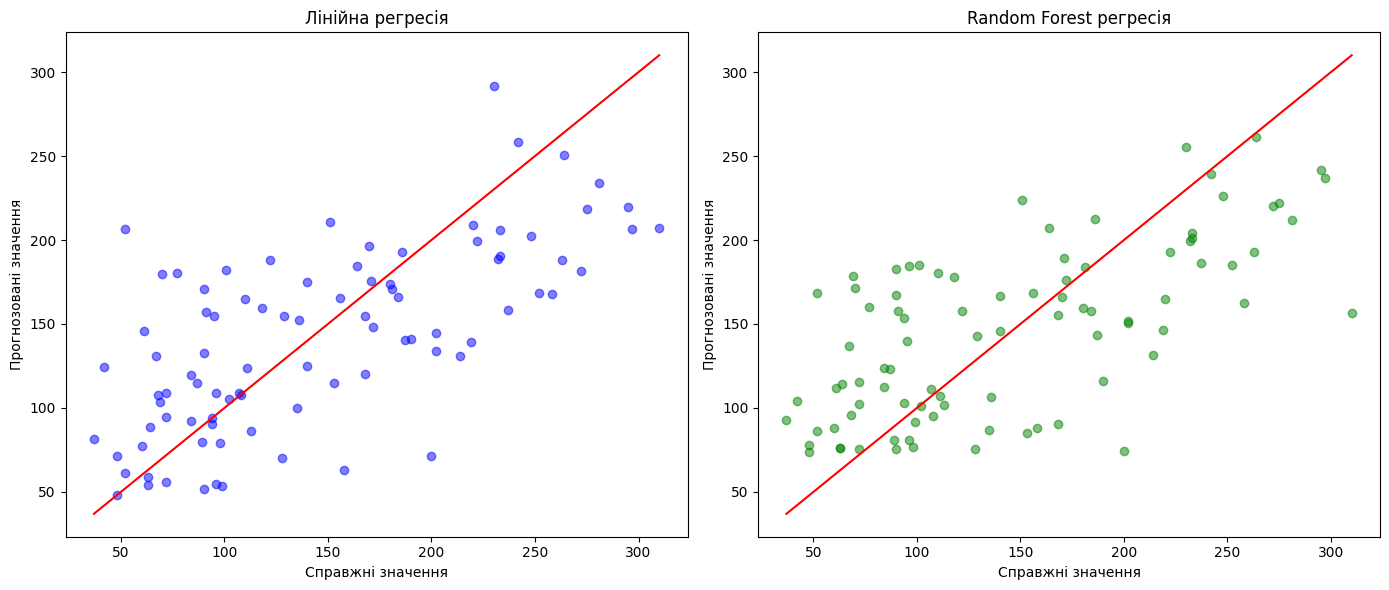

In [133]:
plot_predictions(y_test, y_test_pred_lin, y_test_pred_rf)

## 12. Вивести справжні і прогнозовані значення

In [134]:
comparison = pd.DataFrame({'Справжні значення': y_test, 
                           'Прогнозовані значення (Лін. Регресія)': y_test_pred_lin, 
                           'Прогнозовані значення (Random Forest)': y_test_pred_rf})
display(comparison.head(10))

,Справжні значення,Прогнозовані значення (Лін. Регресія),Прогнозовані значення (Random Forest)
287,219.0,139.547558,146.21
211,70.0,179.517208,171.58
72,202.0,134.038756,150.62
321,230.0,291.417029,255.12
73,111.0,123.789659,107.19
418,84.0,92.172347,123.54
367,242.0,258.232389,239.30
354,272.0,181.337321,220.00
281,94.0,90.224113,153.42
148,96.0,108.633759,184.78


## Висновки

Отже, після побудови легких та примітивних моделей лінійної регресії та Random Forest регресії можна зробити наступні висновки:
- обидві моделі моделі мають велику помилку на тестувальних даних
- лінійна регресія погано прогнозує на тренувальних та тестувальних даних
- random forest регресія пронозую на тренувальних даних набагато краще ніж на тестувальних, що означає про перенавчання
- показник r2 далеке від 1 на тестувальних даних в обох моделях
- на графіках видно, що прогнозовані точки знаходяться далеко від справжніх даних
- потрібно покарщувати обидві моделі

# Завдання 2

In [135]:
california_housing_sklearn = fetch_california_housing()

df_housing = pd.DataFrame(data = california_housing_sklearn.data,
                           columns = california_housing_sklearn.feature_names)

df_housing['target'] = california_housing_sklearn.target

## 1. Провести попередній аналіз даних за схемою (дивиться вище).

In [136]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
# Перевірка пропущених значень
df_housing.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [138]:
# Перевірка на наявність дублікатів
df_housing.duplicated().sum()

0

In [139]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Всі стовпці мають числовий тип даних, тому змінювати їх непотрібно

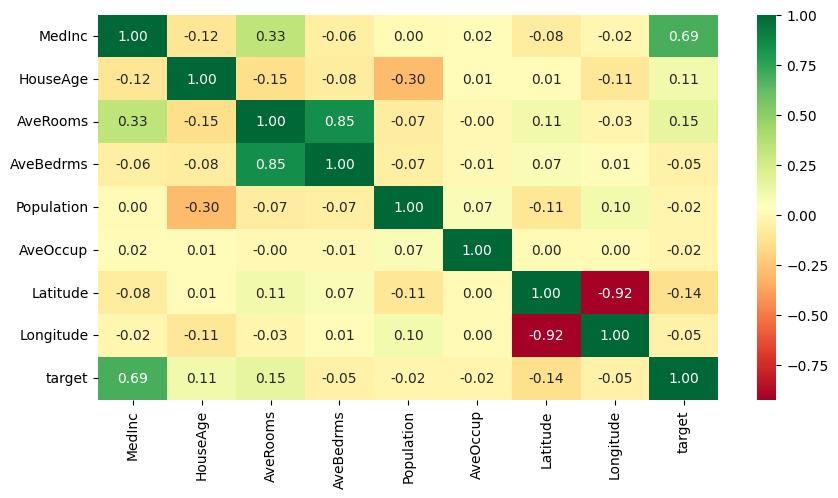

In [140]:
# Побудова теплової карти кореляції 
corr_housing = df_housing.corr()

plt.figure(figsize = (10, 5))
sns.heatmap(data = corr_housing, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [141]:
highest_correlation = corr_housing.unstack().sort_values(ascending = False)
highest_correlation = highest_correlation[highest_correlation < 1].head(5)

print(f"Пари з найвищою кореляцією:\n{highest_correlation}")

Пари з найвищою кореляцією:
AveRooms   AveBedrms    0.847621
AveBedrms  AveRooms     0.847621
target     MedInc       0.688075
MedInc     target       0.688075
           AveRooms     0.326895
dtype: float64


In [142]:
corr_housing['target'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
target        1.000000
Name: target, dtype: float64

Найбільше зі змінною `target` корелює `MedInc`.

## 2. Поділити дані на тренувальні і тестові.

In [143]:
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(df_housing.drop(columns = ['target']), 
                                                                                    df_housing['target'], 
                                                                                    test_size = 0.2, 
                                                                                    random_state = 42)

In [144]:
display(X_train_housing.head(), y_train_housing.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: target, dtype: float64

## 3. Масштабувати ознаки.

In [145]:
X_train_scaled_housing = pd.DataFrame(scaler.fit_transform(X_train_housing), columns = X_train_housing.columns)
X_test_scaled_housing  = pd.DataFrame(scaler.transform(X_test_housing), columns = X_train_housing.columns)

## 4-5. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach. Вивести R2 і MSE. Побудувати графіки.

In [146]:
lin_reg = LinearRegression()
rf_reg  = RandomForestRegressor(random_state = 42)
ridge   = Ridge()

param_grid_ridge = {'alpha' : [0.1, 1, 10, 100]}
param_grid_rf    = {'n_estimators' : [50, 100, 200],
                    'max_depth' : [None, 10, 20, 30]}

ridge_grid = GridSearchCV(ridge, param_grid_ridge, cv = 5, scoring = 'r2')
rf_grid    = GridSearchCV(rf_reg, param_grid_rf, cv = 5, scoring = 'r2')

lin_reg.fit(X_train_scaled_housing, y_train_housing)
ridge_grid.fit(X_train_scaled_housing, y_train_housing)
rf_grid.fit(X_train_scaled_housing, y_train_housing)

y_train_pred_lin_housing   = lin_reg.predict(X_train_scaled_housing)
y_train_pred_ridge_housing = ridge_grid.predict(X_train_scaled_housing)
y_train_pred_rf_housing    = rf_grid.predict(X_train_scaled_housing)

y_test_pred_lin_housing   = lin_reg.predict(X_test_scaled_housing)
y_test_pred_ridge_housing = ridge_grid.predict(X_test_scaled_housing)
y_test_pred_rf_housing    = rf_grid.predict(X_test_scaled_housing)

train_loss_lin_housing, test_loss_lin_housing, r2_train_lin_housing, r2_test_lin_housing = estimation_linear_regr(y_train_housing, 
                                                                                                                  y_test_housing, 
                                                                                                                  y_train_pred_lin_housing, 
                                                                                                                  y_test_pred_lin_housing)

train_loss_ridge_housing, test_loss_ridge_housing, r2_train_ridge_housing, r2_test_ridge_housing = estimation_linear_regr(y_train_housing, 
                                                                                                                          y_test_housing, 
                                                                                                                          y_train_pred_ridge_housing, 
                                                                                                                          y_test_pred_ridge_housing)

train_loss_rf_housing, test_loss_rf_housing, r2_train_rf_housing, r2_test_rf_housing = estimation_linear_regr(y_train_housing, 
                                                                                                              y_test_housing, 
                                                                                                              y_train_pred_rf_housing, 
                                                                                                              y_test_pred_rf_housing)
print('ЛІНІЙНА РЕГРЕСІЯ')
print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss_lin_housing, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss_lin_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тренувальному наборі даних: {round(r2_train_lin_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {round(r2_test_lin_housing, 2)}')

print('\nМОДЕЛЬ RIDGE')
print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss_ridge_housing, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss_ridge_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тренувальному наборі даних: {round(r2_train_ridge_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {round(r2_test_ridge_housing, 2)}')

print('\nRANDOM FOREST REGRESSOR')
print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss_rf_housing, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss_rf_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тренувальному наборі даних: {round(r2_train_rf_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {round(r2_test_rf_housing, 2)}')

ЛІНІЙНА РЕГРЕСІЯ
Помилка моделі на тренувальному наборі даних: 0.52
Помилка моделі на тестувальному наборі даних: 0.56
Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.61
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.58

МОДЕЛЬ RIDGE
Помилка моделі на тренувальному наборі даних: 0.52
Помилка моделі на тестувальному наборі даних: 0.56
Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.61
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.58

RANDOM FOREST REGRESSOR
Помилка моделі на тренувальному наборі даних: 0.04
Помилка моделі на тестувальному наборі даних: 0.25
Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.97
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.81


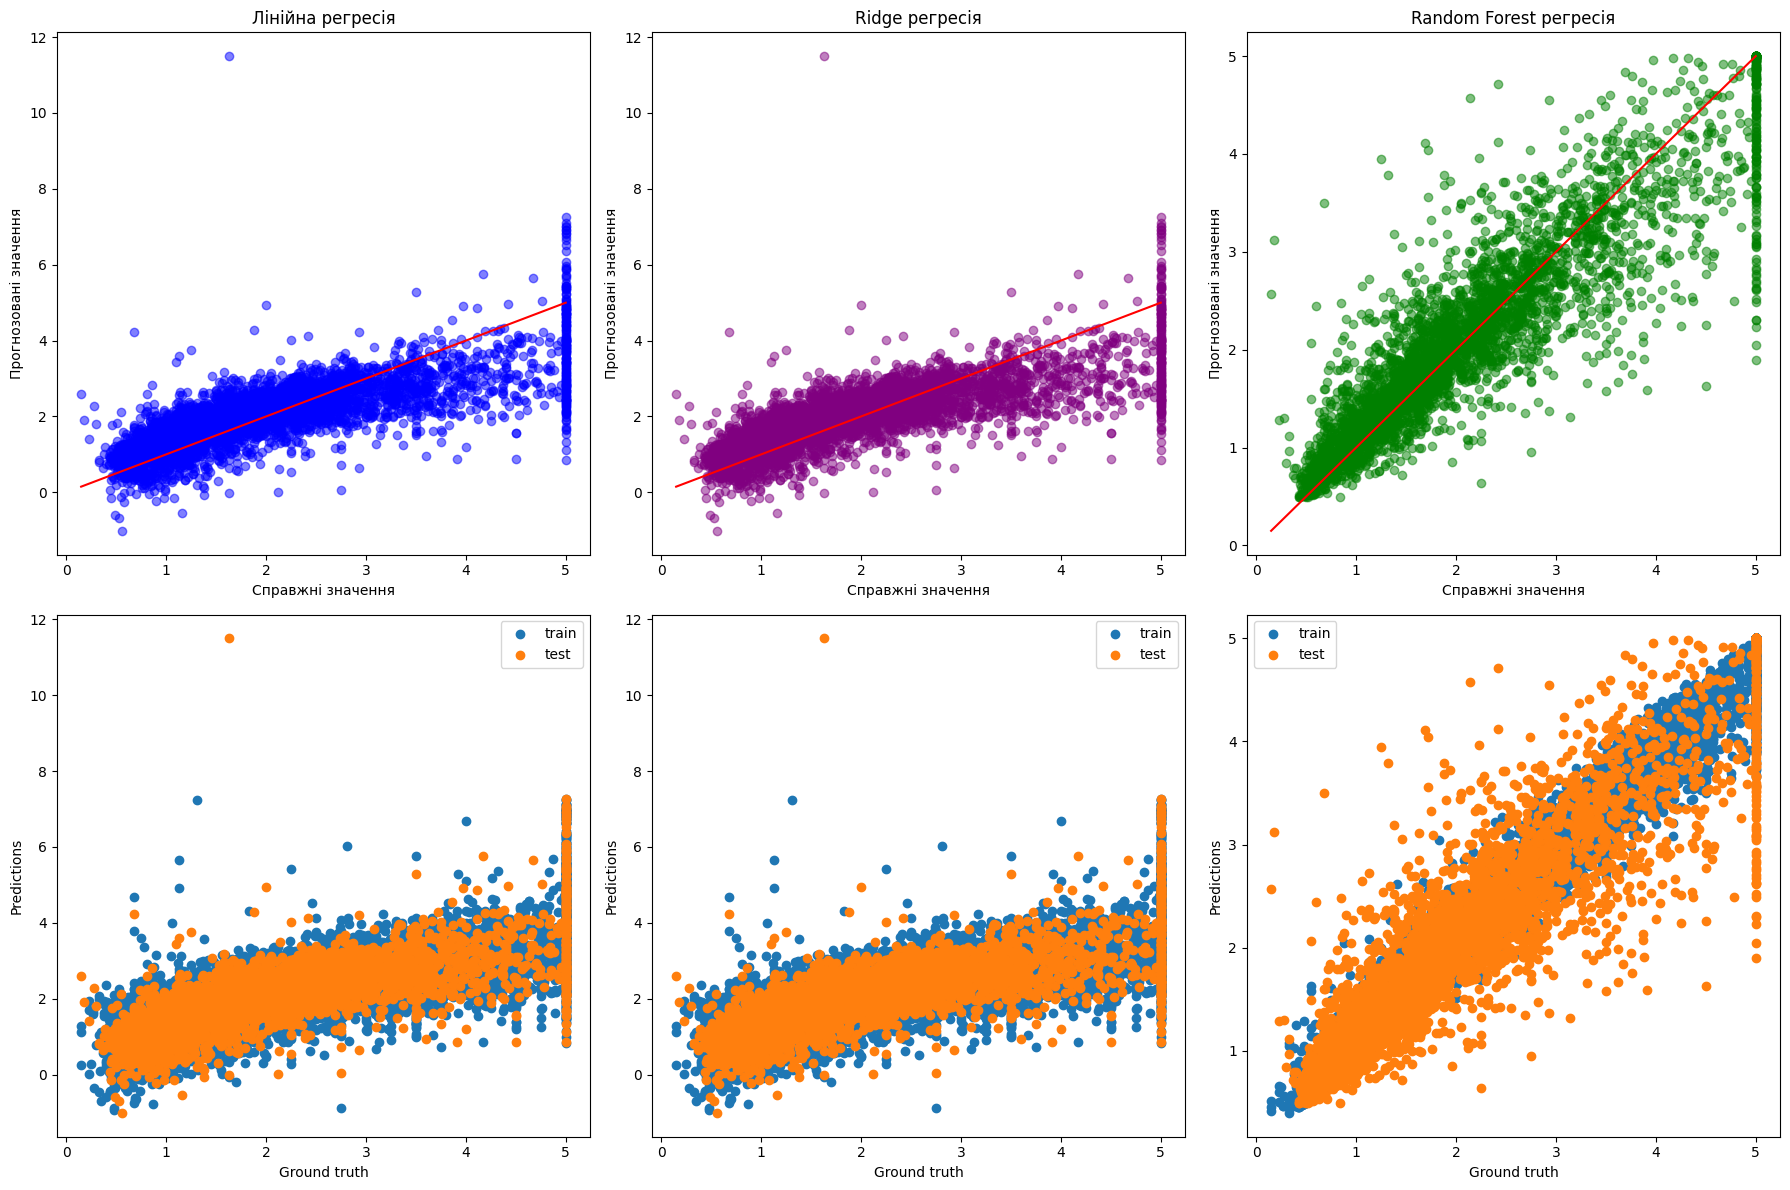

In [156]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].scatter(y_test_housing, y_test_pred_lin_housing, color = 'blue', alpha = 0.5)
axs[0, 0].plot([min(y_test_housing), max(y_test_housing)], [min(y_test_housing), max(y_test_housing)], color = 'red')
axs[0, 0].set_title("Лінійна регресія")
axs[0, 0].set_xlabel("Справжні значення")
axs[0, 0].set_ylabel("Прогнозовані значення")

axs[0, 1].scatter(y_test_housing, y_test_pred_ridge_housing, color = 'purple', alpha = 0.5)
axs[0, 1].plot([min(y_test_housing), max(y_test_housing)], [min(y_test_housing), max(y_test_housing)], color = 'red')
axs[0, 1].set_title("Ridge регресія")
axs[0, 1].set_xlabel("Справжні значення")
axs[0, 1].set_ylabel("Прогнозовані значення")

axs[0, 2].scatter(y_test_housing, y_test_pred_rf_housing, color = 'green', alpha = 0.5)
axs[0, 2].plot([min(y_test_housing), max(y_test_housing)], [min(y_test_housing), max(y_test_housing)], color = 'red')
axs[0, 2].set_title("Random Forest регресія")
axs[0, 2].set_xlabel("Справжні значення")
axs[0, 2].set_ylabel("Прогнозовані значення")

axs[1, 0].scatter(y_train_housing, y_train_pred_lin_housing, label = 'train')
axs[1, 0].scatter(y_test_housing, y_test_pred_lin_housing, label = 'test')
axs[1, 0].set_xlabel('Ground truth')
axs[1, 0].set_ylabel('Predictions')
axs[1, 0].legend()

axs[1, 1].scatter(y_train_housing, y_train_pred_ridge_housing, label = 'train')
axs[1, 1].scatter(y_test_housing, y_test_pred_ridge_housing, label = 'test')
axs[1, 1].set_xlabel('Ground truth')
axs[1, 1].set_ylabel('Predictions')
axs[1, 1].legend()

axs[1, 2].scatter(y_train_housing, y_train_pred_rf_housing, label = 'train')
axs[1, 2].scatter(y_test_housing, y_test_pred_rf_housing, label = 'test')
axs[1, 2].set_xlabel('Ground truth')
axs[1, 2].set_ylabel('Predictions')
axs[1, 2].legend()

plt.tight_layout()
plt.show()

In [157]:
print("\nНайкращі параметри для Ridge регресії:", ridge_grid.best_params_)
print("Найкращі параметри для Random Forest регресії:", rf_grid.best_params_)


Найкращі параметри для Ridge регресії: {'alpha': 0.1}
Найкращі параметри для Random Forest регресії: {'max_depth': 20, 'n_estimators': 200}


## 6. Вивести справжні і прогнозовані значення.

In [149]:
comparison = pd.DataFrame({'Справжні значення': y_test_housing, 
                           'Прогнозовані значення (Лін. Регресія)': y_test_pred_lin_housing, 
                           'Прогнозовані значення (Ridge)': y_test_pred_ridge_housing,
                           'Прогнозовані значення (Random Forest)': y_test_pred_rf_housing})
display(comparison.head(10))

,Справжні значення,Прогнозовані значення (Лін. Регресія),Прогнозовані значення (Ridge),Прогнозовані значення (Random Forest)
20046,0.47700,0.719123,0.719158,0.502369
3024,0.45800,1.764017,1.764000,0.738781
15663,5.00001,2.709659,2.709624,4.891107
20484,2.18600,2.838926,2.838909,2.535699
9814,2.78000,2.604657,2.604609,2.253975
13311,1.58700,2.011754,2.011769,1.655008
7113,1.98200,2.645500,2.645504,2.374743
7668,1.57500,2.168755,2.168756,1.660651
18246,3.40000,2.740746,2.740685,2.637780
5723,4.46600,3.915615,3.915628,4.901284


## Дослідження лінійної регресії

In [158]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train_scaled_housing.columns, 1),
    'weight': np.append(lin_reg.coef_, lin_reg.intercept_)
})
weights_df.sort_values('weight').round(2).style.background_gradient()

,feature,weight
6,Latitude,-0.900000
7,Longitude,-0.870000
2,AveRooms,-0.290000
5,AveOccup,-0.040000
4,Population,-0.000000
1,HouseAge,0.120000
3,AveBedrms,0.340000
0,MedInc,0.850000
8,1,2.070000


Найбільш важливі ознаки з точки зору коефіцієнтів - `MedInc`.

In [160]:
# тренування моделі statsmodels

X       = sm.add_constant(X_train_scaled_housing)
model   = sm.OLS(y_train_housing.values, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:41:53   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.006    369.848      0.0

Для визначення статистично значущих ознак на рівні 0.05, слід звернути увагу на значення P>|t| в таблиці. Якщо значення P>|t| менше 0.05, то відповідна ознака є статистично значущою.

Переглядаючи таблицю, можна виділити наступні ознаки:

1. **MedInc** (P>|t| = 0.000)
2. **HouseAge** (P>|t| = 0.000)
3. **AveRooms** (P>|t| = 0.000)
4. **AveBedrms** (P>|t| = 0.000)
5. **AveOccup** (P>|t| = 0.000)
6. **Latitude** (P>|t| = 0.000)
7. **Longitude** (P>|t| = 0.001)

Ці ознаки мають значення P>|t| менше 0.05, що робить їх статистично значущими на рівні 0.05.

In [162]:
# тренування моделі на ознаках, які виявились статистично значущими

significant_features = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "AveOccup",
    "Latitude",
    "Longitude"
]

X_1     = sm.add_constant(X_train_scaled_housing[significant_features])
model_1   = sm.OLS(y_train_housing.values, X_1)
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3727.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:46:46   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16504   BIC:                         3.607e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.006    369.857      0.0

Поки що модель не покращилась

## Висновки

Отже, після побудови трьох моделей та підбору параметрів можна зробити наступні висновки:
- найкраща модель - random forest: 
    - Модель має найменшу помилку на тестувальних даних, та показник r2 = 0.81, що близько до 1. 
    - Модель трохи перенавчена, але з цим можна боротися.
    - Найкращі параметри моделі: {'max_depth': 20, 'n_estimators': 200} 
- моделі лінійної регресії та Ridge показали відносно однакові результати. Ці результати нас не задовольняють.